In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/data1.csv")
data

,Unnamed: 0,gender,age,height(cm),weight(kg),eyesight(left),hearing(left),hearing(right),relaxation,fasting blood sugar,...,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar,smoking
0,0,0,40,155,60,1.2,1.0,1.0,73.0,94.0,...,82.0,73.0,12.9,1.0,0.7,18.0,27.0,0,1,0
1,1,0,40,160,60,0.8,1.0,1.0,70.0,130.0,...,115.0,42.0,12.7,1.0,0.6,22.0,18.0,0,1,0
2,2,1,55,170,60,0.8,1.0,1.0,86.0,89.0,...,182.0,55.0,15.8,1.0,1.0,21.0,22.0,0,0,1
3,3,1,40,165,70,1.5,1.0,1.0,60.0,96.0,...,254.0,45.0,14.7,1.0,1.0,19.0,18.0,0,1,0
4,4,0,40,155,60,1.0,1.0,1.0,74.0,80.0,...,74.0,62.0,12.5,1.0,0.6,16.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55687,0,40,170,65,0.9,1.0,1.0,68.0,89.0,...,99.0,75.0,12.3,1.0,0.6,14.0,10.0,1,1,0
55688,55688,0,45,160,50,1.2,1.0,1.0,62.0,89.0,...,69.0,73.0,14.0,1.0,0.9,20.0,14.0,0,1,0
55689,55689,0,55,160,50,1.0,1.0,1.0,72.0,88.0,...,77.0,79.0,12.4,1.0,0.5,17.0,12.0,0,0,0
55690,55690,1,60,165,60,0.8,1.0,1.0,76.0,107.0,...,79.0,48.0,14.4,1.0,0.7,20.0,18.0,0,0,0


In [4]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [5]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()

,gender,age,height(cm),weight(kg),eyesight(left),hearing(left),hearing(right),relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar
0,0,40,155,60,1.2,1.0,1.0,73.0,94.0,215.0,82.0,73.0,12.9,1.0,0.7,18.0,27.0,0,1
1,0,40,160,60,0.8,1.0,1.0,70.0,130.0,192.0,115.0,42.0,12.7,1.0,0.6,22.0,18.0,0,1
2,1,55,170,60,0.8,1.0,1.0,86.0,89.0,242.0,182.0,55.0,15.8,1.0,1.0,21.0,22.0,0,0
3,1,40,165,70,1.5,1.0,1.0,60.0,96.0,322.0,254.0,45.0,14.7,1.0,1.0,19.0,18.0,0,1
4,0,40,155,60,1.0,1.0,1.0,74.0,80.0,184.0,74.0,62.0,12.5,1.0,0.6,16.0,22.0,0,0


Normalizujemo podatke:

In [9]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
X_pca

array([[ 0.24786858,  0.73422973, -0.26581316, -0.12145573,  0.09109644,
         0.00332974],
       [ 0.23377718,  0.72066986, -0.26801739, -0.12980394,  0.10705581,
         0.01174727],
       [ 0.17410909, -0.66930645, -0.06200268,  0.08737498, -0.1915352 ,
         0.04688304],
       ...,
       [ 0.90238861,  0.04558979,  0.0637915 , -0.02093303, -0.05507741,
        -0.05563884],
       [ 0.21039703, -0.63941251, -0.05928575,  0.13941052, -0.25201992,
        -0.07332413],
       [-0.42373668,  0.0611669 , -0.3913457 ,  0.12875934, -0.21631738,
        -0.06431468]])

In [13]:
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [14]:
X_pca.head()

,PC1,PC2
0,0.247869,0.734230
1,0.233777,0.720670
2,0.174109,-0.669306
3,-0.465641,0.033285
4,0.878671,0.033941


Klasterovacemo podatke u razlicitom broju klastera i za svako racunati sileta Silhouette 
koeficijent kako bismo procenilo kvalitet klasterovanja:

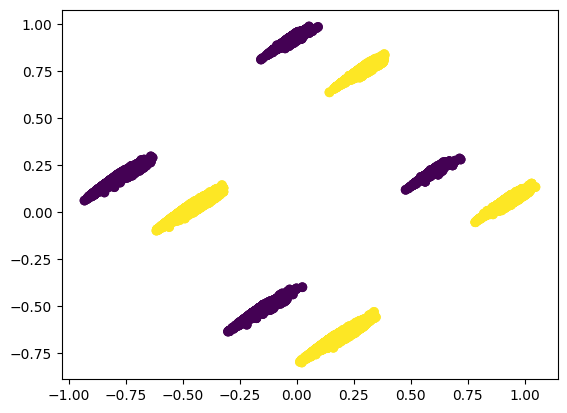

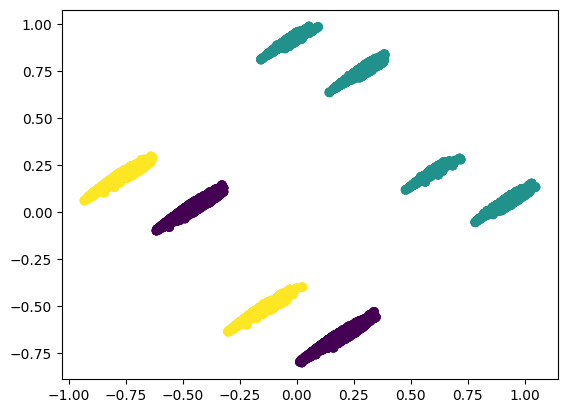

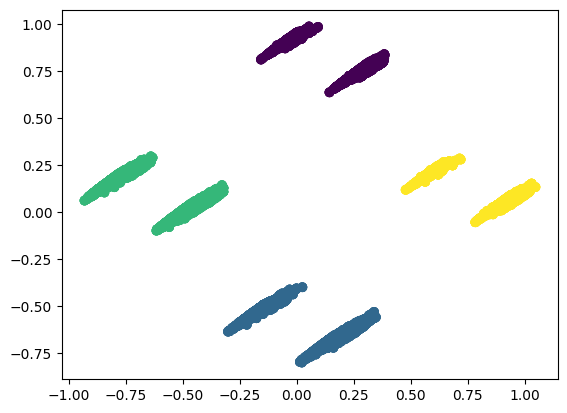

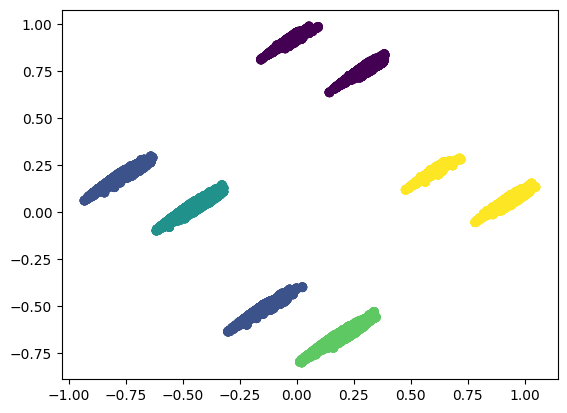

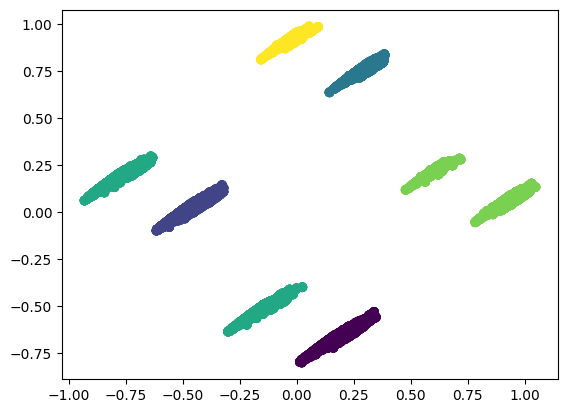

In [25]:
silhouettes = []

for i in range(2, 7):
    gmm = GaussianMixture(n_components = i)
    gmm.fit(X)
    labels = gmm.predict(X)
    for j in range (i):
        plt.scatter(X_pca["PC1"], X_pca["PC2"], c=labels)
    silhouettes.append(silhouette_score(X, labels))
    plt.show()

In [26]:
silhouettes

[0.2986933700229806,
 0.3726754808761835,
 0.4662701199183966,
 0.5164811802285115,
 0.5422030316055353]

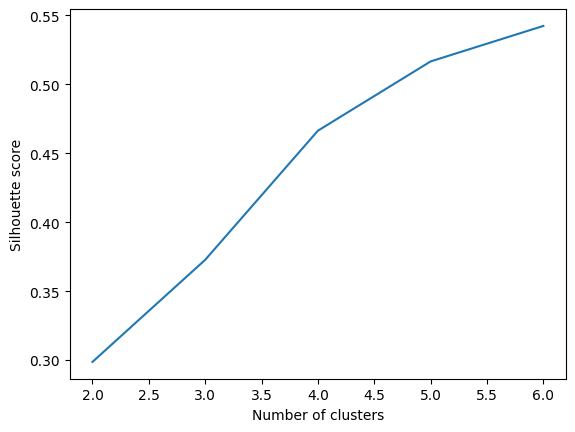

In [53]:
plt.plot(range(2, 7), silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Silhouette Diagram

Još detaljnija vizuelizacija je silhouette dijagram koji se dobija vizuelizacijom silhouette coef za svaku instancu klastera, sortirane opadajuće. Debljina svakog klastera nam daje informaciju o veličini klastera,
a širina o silhouette skoru svake instance (što je šira to je bolje).

For n_clusters = 2 The average silhouette_score is : 0.5483866956356834


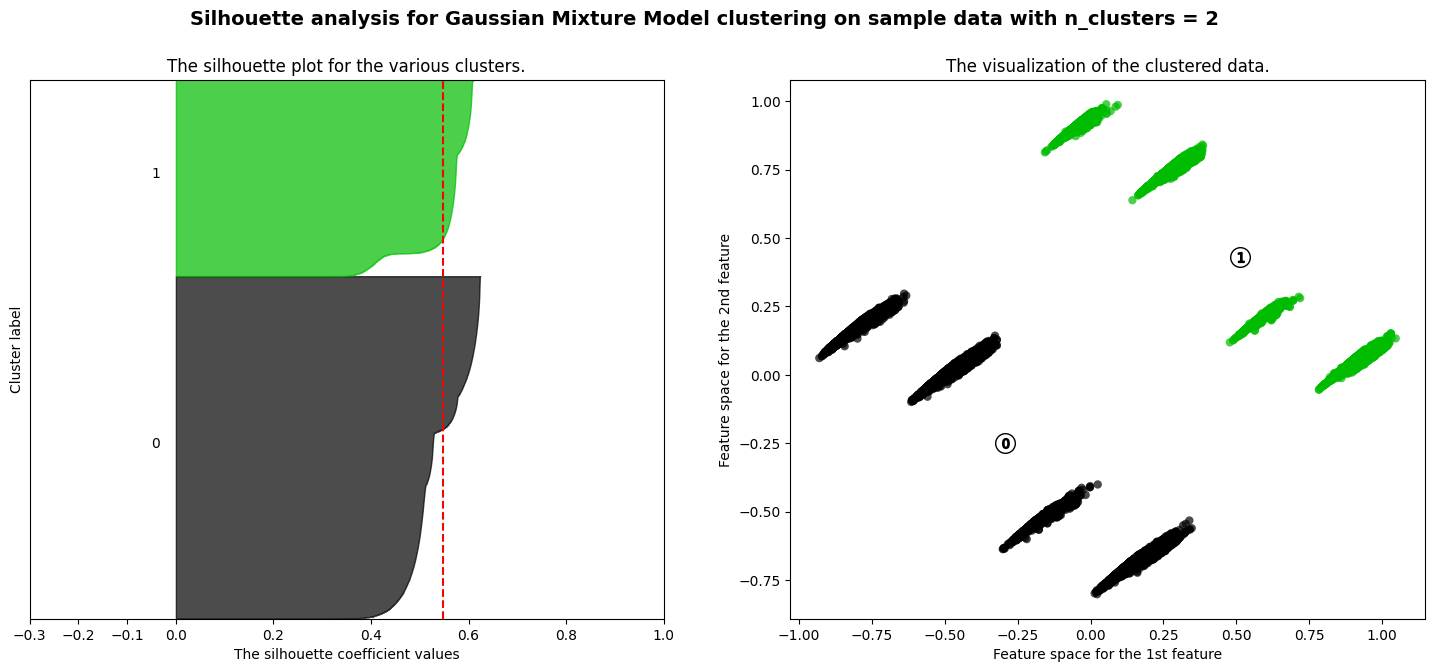

For n_clusters = 3 The average silhouette_score is : 0.6991340806350556


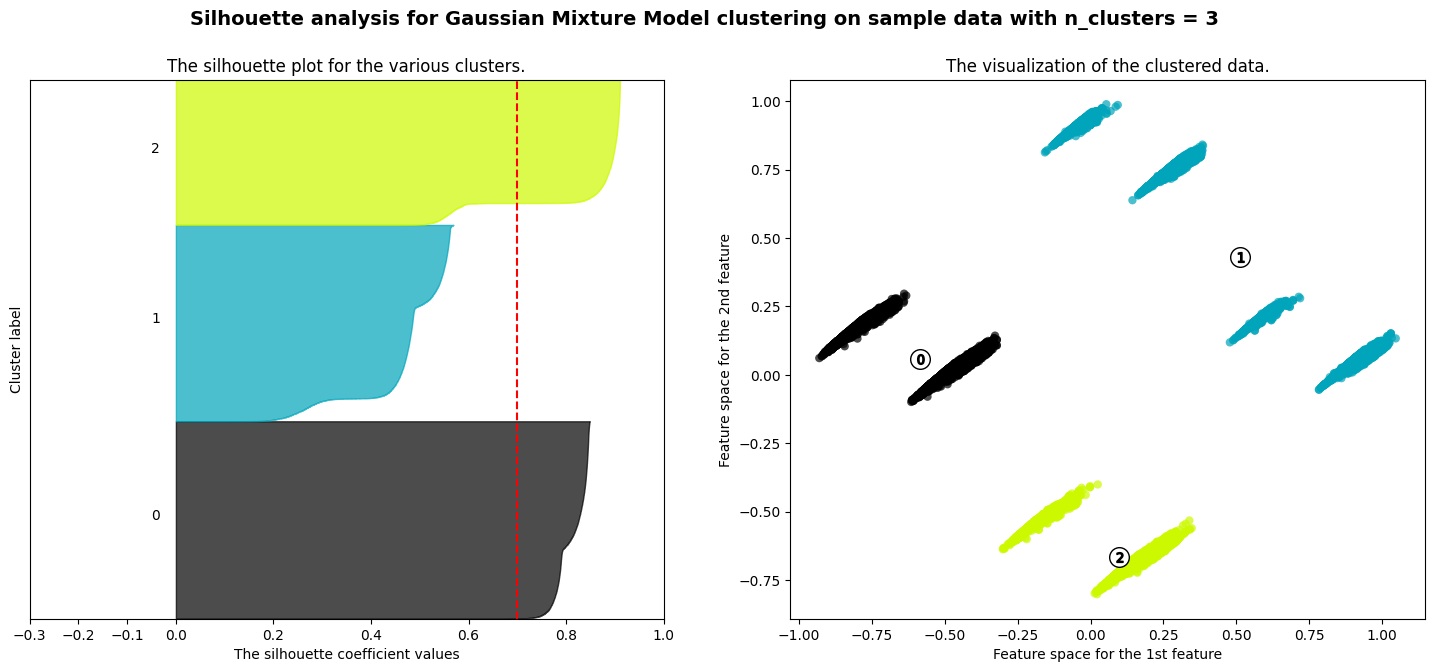

For n_clusters = 4 The average silhouette_score is : 0.8359686408479784


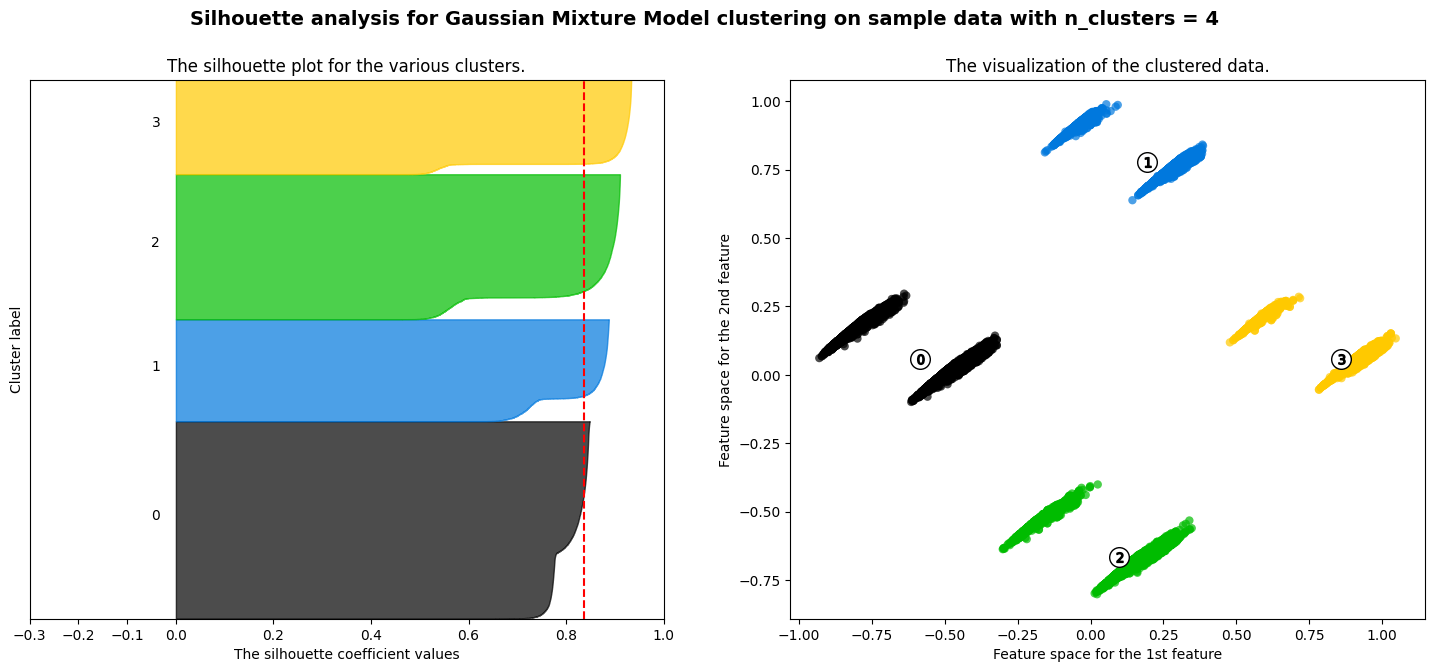

For n_clusters = 5 The average silhouette_score is : 0.8245191587854527


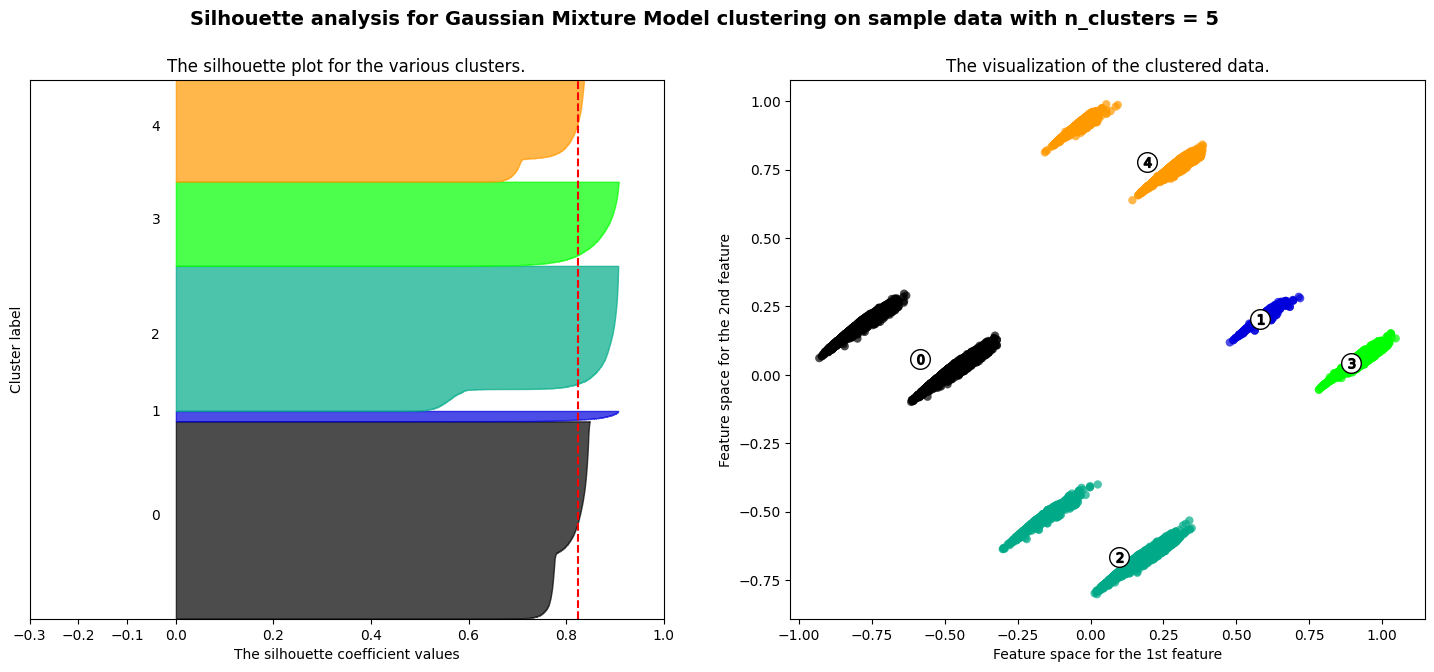

For n_clusters = 6 The average silhouette_score is : 0.8283484640351684


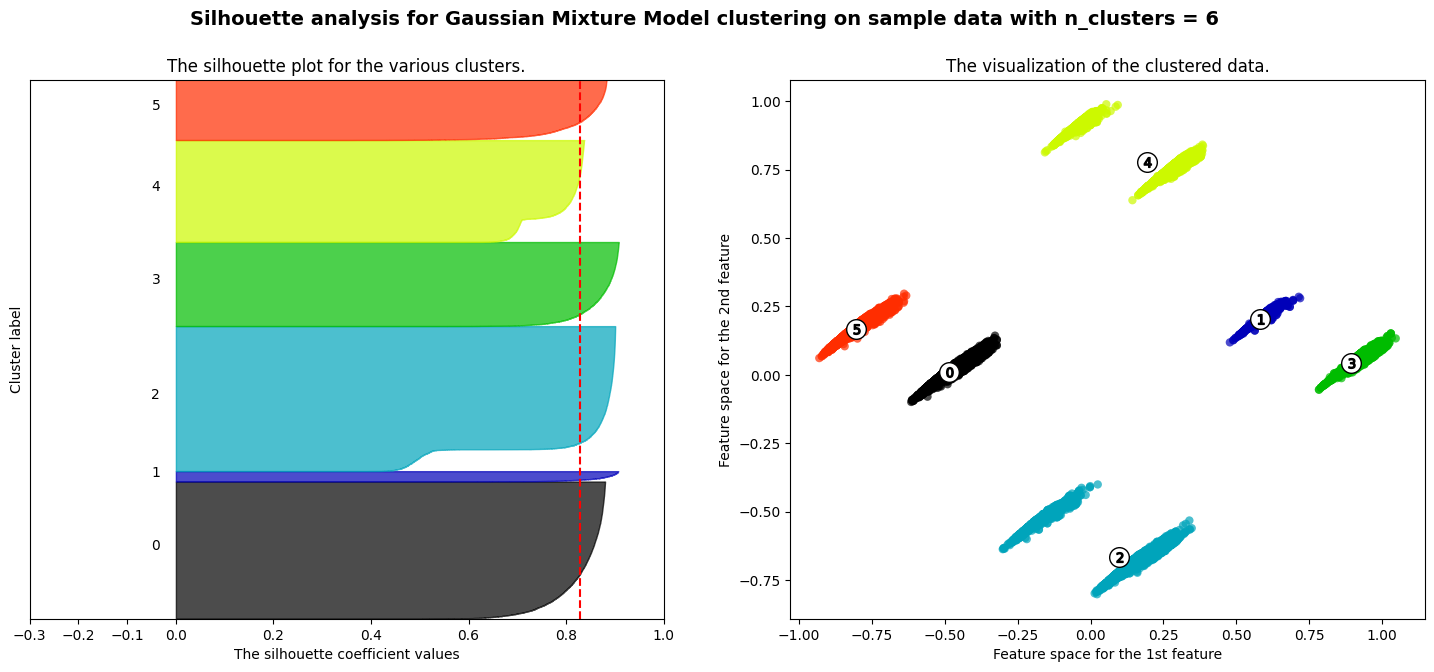

In [30]:
import matplotlib.cm as cm

def plot_gmm_silhouette(X, n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the Gaussian Mixture Model with n_clusters value
    gmm = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = gmm.fit_predict(X)

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_pca["PC1"], X_pca["PC2"], marker="o", lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = gmm.means_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for Gaussian Mixture Model clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

# Pozivanje funkcije za različite brojeve klastera
for n_clusters in [2, 3, 4, 5, 6]:
    plot_gmm_silhouette(X_pca, n_clusters)


Vidimo da je Silhouetta koeficijent najveci za cetiri klastera.

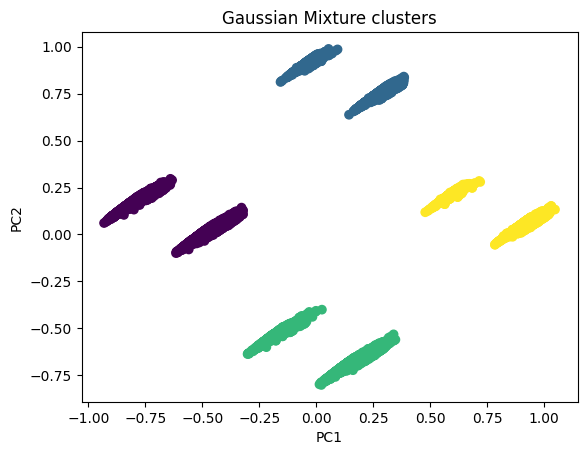

In [46]:
model = GaussianMixture(n_components = 4)
model.fit(X)
labels = model.predict(X)

X_pca['labels']= labels
scatter = plt.scatter(X_pca["PC1"], X_pca["PC2"],c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('{} clusters'.format("Gaussian Mixture"))
plt.show()



In [50]:
from sklearn.metrics import silhouette_score, homogeneity_score
# Homogenost klastera
homogeneity_score(labels_true=Y, labels_pred=labels)

0.2434588824635009

In [51]:
# Silueta
silhouette_score(X, labels, metric='euclidean')

0.4662701199183966